<a href="https://colab.research.google.com/github/lailatulbadriyah24/2141720036-PCVK-2023/blob/main/Week05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kelompok 6 - TI3H**

Anggota Kelompok:

1. Andi Dwi Prastyo / 06 / 2141720046

2. Ilham Yudantyo / 13 / 2141720091

3. Lailatul Badriyah / 14 / 2141720036


In [130]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

path = '/content/drive/MyDrive/PCVK/female.tiff'

### 1. Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
-------------------------------
Masukkan nilai Gamma: 3


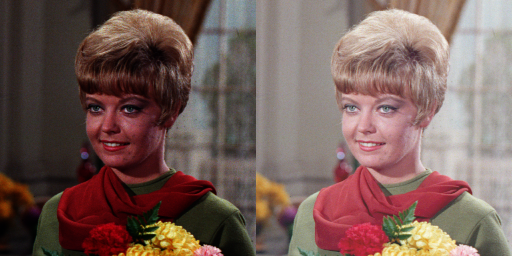

In [132]:
print(' Gamma Correction pada citra ')
print('-------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

ori = cv.imread(path)
gamma_correction = np.zeros(ori.shape, ori.dtype)

for y in range(ori.shape[0]):
  for x in range(ori.shape[1]):
    for c in range(ori.shape[2]):
      gamma_correction[y,x,c] = np.clip(255 * pow  (ori[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((ori, gamma_correction))
cv2_imshow(final_frame)

### 2. Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra, pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga 255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000 0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika 7bit, maka jumlah warnanya adalah 27 = 128, dst.


Image Depth pada citra
----------------------


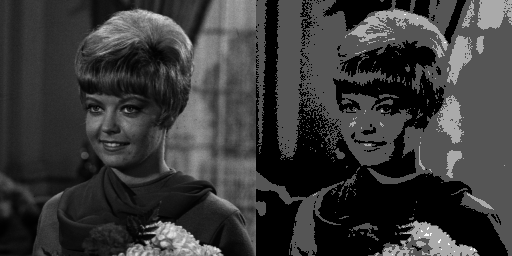

In [133]:
print('Image Depth pada citra')
print('----------------------')

bit_depth = 2
level = 255 / (pow(2,bit_depth)-1)

original = cv.imread(path, cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
     depth_image[y,x] = np.clip(round(original[y,x] / level) * level, 0, 255);

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(final_frame)

### 3. Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab sebelumnya. Citra asli sudah disediakan pada /images/galaxy.jpg. 100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder, gunakan modul glob (import glob).

In [134]:
import glob

origin = cv.imread('/content/drive/MyDrive/PCVK/galaxy.jpg')

cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

Iteration: 5, Average with 5 photos
PSNR (Jobsheet): 27.542806254915586
PSNR (OpenCV): 19.52886279956799



Iteration: 10, Average with 10 photos
PSNR (Jobsheet): 27.557977380642804
PSNR (OpenCV): 19.734217334394327



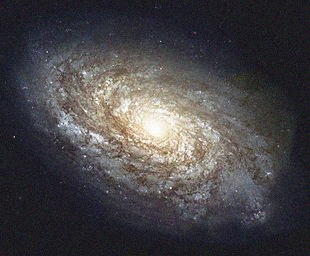

Iteration: 20, Average with 20 photos
PSNR (Jobsheet): 27.516028795621637
PSNR (OpenCV): 19.841225231372434



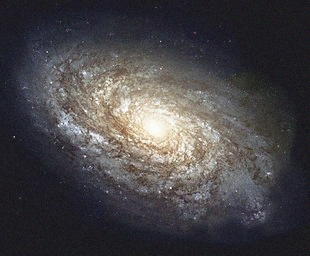

Iteration: 40, Average with 40 photos
PSNR (Jobsheet): 27.456694107144916
PSNR (OpenCV): 19.892766874601403



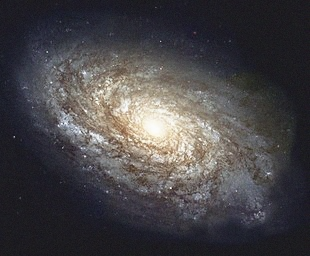

Iteration: 80, Average with 80 photos
PSNR (Jobsheet): 27.40374262959567
PSNR (OpenCV): 19.91622174150064



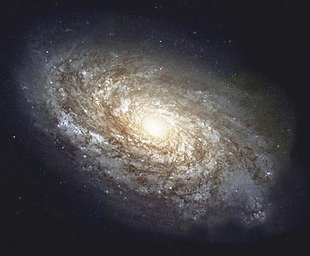

Iteration: 100, Average with 100 photos
PSNR (Jobsheet): 27.370931279516654
PSNR (OpenCV): 19.92196095594035



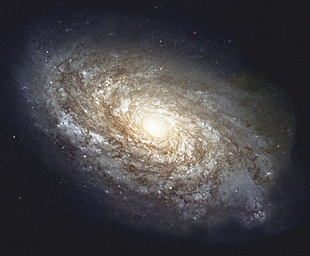

In [135]:
# Iterations
iterations = [5, 10, 20, 40, 80, 100]
cv_img = np.array(cv_img)

for i in iterations:
    res = np.uint8(np.mean(cv_img[:i], axis=0))
    psnr_custom = PSNR(ref, res)
    psnr_opencv = cv2.PSNR(ref, res)

    print(f"Iteration: {i}, Average with {i} photos")
    print(f"PSNR (Jobsheet): {psnr_custom}")
    print(f"PSNR (OpenCV): {psnr_opencv}\n")

    cv2_imshow(res)

Penggunaan rumus yang ada pada jobsheet menghasilkan hasil PSNR yang tidak selalu stabil dan berubah-ubah. Karena ketika kita menggunakan lebih banyak gambar, seharusnya gambar tersebut menjadi lebih bersih dan nilai PSNR seharusnya menjadi lebih tinggi. Namun, jika menggunakan fungsi PSNR dari library cv2, hasilnya akan sesuai dan masuk akal.

### 4. Buat image masking untuk image berikut. Image kiri adalah image asli (image KTP), sedangkan image paling kanan adalah hasilnya:

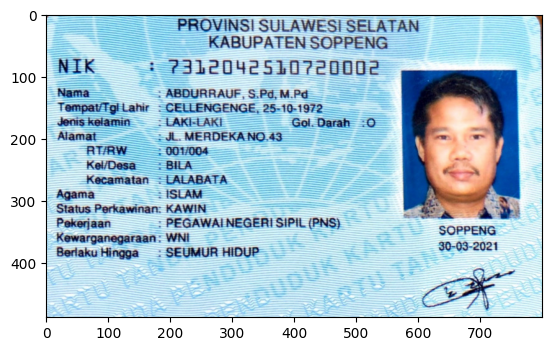

In [136]:
ktp_ori = cv.imread('/content/drive/MyDrive/PCVK/ktp.jpeg')
ktp = cv.cvtColor(ktp_ori, cv.COLOR_RGB2BGR)
plt.imshow(ktp)

In [137]:
mask = np.zeros(ktp.shape, dtype = "uint8")
x, y = 670, 250
radius = 25
cv.circle(mask, (x, y), radius, (255, 255, 255), thickness=cv.FILLED)

masked_img = cv.bitwise_and(ktp_ori, mask)

frame = cv.hconcat((ktp_ori, mask, masked_img))
cv2_imshow(frame)

### 5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

In [160]:
# Operasi NOT (Komplemen)
masked_not_img = cv2.bitwise_not(mask)

# Operasi AND
masked_and_img = cv2.bitwise_and(ktp_ori, mask)

# Operasi OR
masked_or_img = cv2.bitwise_or(ktp_ori, mask)

# Operasi NAND (NOT AND)
masked_nand_img = cv2.bitwise_not(masked_and_img)

# Operasi XOR
masked_xor_img = cv2.bitwise_xor(ktp_ori, mask)

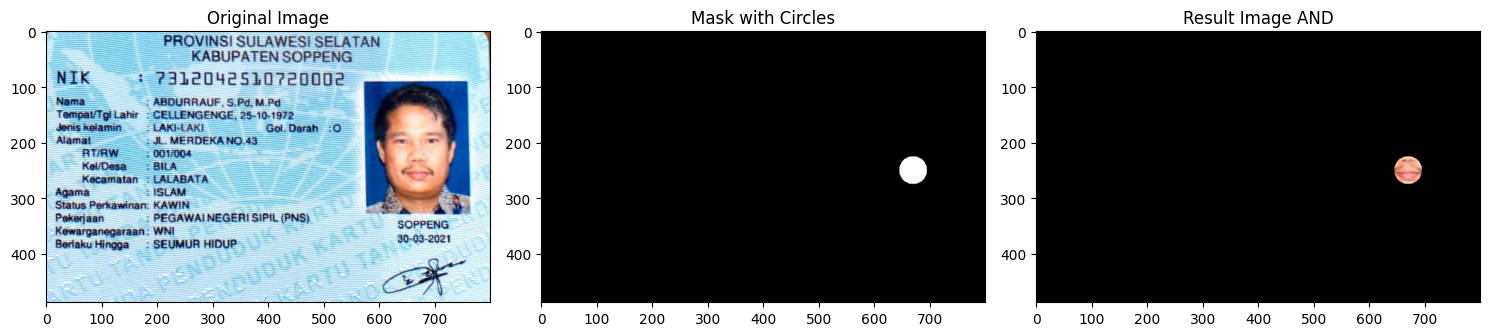

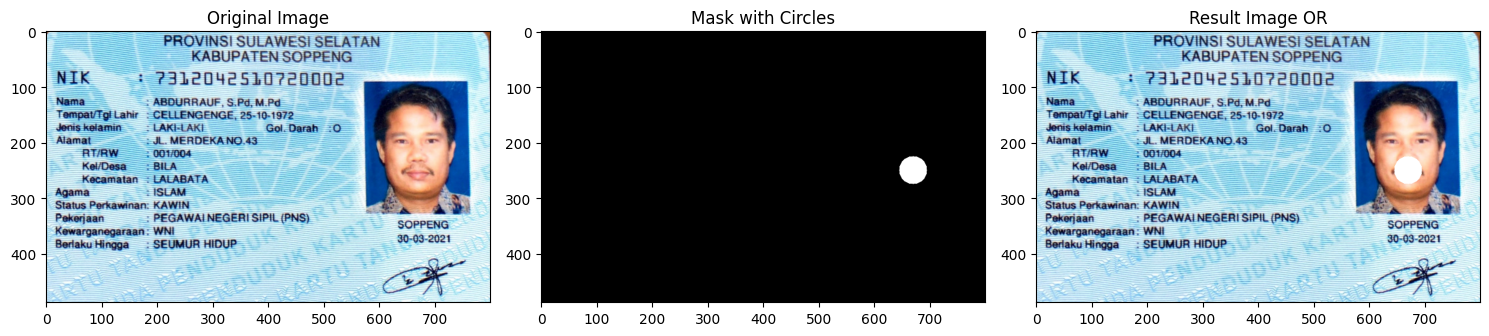

In [161]:
# NOT
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(ktp_ori, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(masked_not_img, cv.COLOR_BGR2RGB))
plt.title('Result Image NOT')

plt.tight_layout()
plt.show()

# AND
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(ktp_ori, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(masked_and_img, cv.COLOR_BGR2RGB))
plt.title('Result Image AND')

plt.tight_layout()
plt.show()

# OR
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(ktp_ori, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(masked_or_img, cv.COLOR_BGR2RGB))
plt.title('Result Image OR')

plt.tight_layout()
plt.show()

# NAND
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(ktp_ori, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(masked_nand_img, cv.COLOR_BGR2RGB))
plt.title('Result Image NAND')

plt.tight_layout()
plt.show()

# XOR
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.imshow(cv.cvtColor(ktp_ori, cv.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(132)
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.title('Mask with Circles')

plt.subplot(133)
plt.imshow(cv.cvtColor(masked_xor_img, cv.COLOR_BGR2RGB))
plt.title('Result Image XOR')

plt.tight_layout()
plt.show()

- Operasi NOT, pada masking image menghasilkan kebalikan dari piksel pada gambar. Dengan kata lain, jika piksel pada gambar asli adalah putih, setelah operasi NOT, piksel tersebut akan menjadi hitam, dan sebaliknya.

- Operasi AND akan menampilkan hanya area gambar yang tumpang tindih dengan masking berwarna putih. Ini berarti hanya area tersebut yang akan muncul dalam hasil operasi, sedangkan area lain akan menjadi hitam.

- Operasi OR dengan masking berwarna putih, area tersebut akan tetap ditampilkan dalam hasil gabungan, sementara area lainnya akan mempertahankan warnanya seperti dalam gambar asli.

- Operasi NAND, pada dasarnya adalah kebalikan dari operasi AND. Ini berarti, hasilnya akan memberikan negasi dari apa yang ditampilkan oleh operasi AND yang sama.

- Operasi XOR, yang merupakan singkatan dari Eksklusif OR, akan menghasilkan area gambar yang tumpang tindih dengan masking putih dengan warna yang berlawanan, sedangkan area lainnya akan tetap seperti pada gambar asli.